# Pybar quick tutorial

In [11]:
%matplotlib inline

In [1]:
infolder = "/home/soft/python/pybar-master/"

In [2]:
import pybar

### First visualising velocity fields

In [3]:
# Creating an artificial model, first with a grid in X and Y
X, Y = np.meshgrid(np.linspace(-10,10,21), np.linspace(-10,10,21))
# Creating a Gaussian for the flux
F = exp(-(X**2 + Y**2 / 0.8**2) / (2. * 3.0**2))
# Creating a dummy velocity field using X * F
V = X * F

In [4]:
bar = pybar.mybar(Flux=F, Velocity=V, Xin=X, Yin=Y, alphaNorth=20.0, PAbar=50.0)

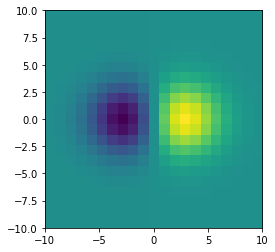

In [12]:
# Now the structure "bar" has many variables you can use. For example to visualise the 
# Velocity field, you can use bar.Xin, bar.Yin, bar.Vel
ex, Xn, Yn, Zn = pybar.visualise_data(bar.Xin, bar.Yin, bar.Vel)

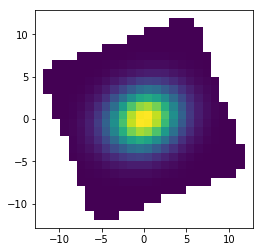

In [13]:
# If you wish to look now at the Flux but using the North_East orientation
# Just use bar.X_NE and bar.Y_NE
ex, Xn, Yn, Zn = pybar.visualise_data(bar.X_NE, bar.Y_NE, F)

## Now using existing data

In [16]:
# Specifying some input parameters
delta = 30.0
inclin = 30.0
alphasky = 26.56505117707799
PAnodes = -60.0
PAbar = alphasky + PAnodes
X, Y, F, V = np.loadtxt(infolder + 'data/example.dat').T

In [17]:
# Creating a grid with a new step size
step = 5.
minX = step * 100.0
Xn, Yn = np.meshgrid(linspace(-minX, minX, 201), linspace(-minX, minX, 201))

In [18]:
# We create the mybar structure (we call it 'bar')
bar = pybar.mybar(Flux=F, Velocity=V, Xin=Xn, Yin=Yn, alphaNorth=0.0, PAbar=PAbar, PAnodes=PAnodes, inclin=inclin)

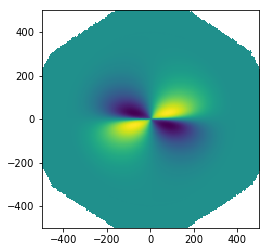

In [21]:
# We can resample it, using a new "newextent" [xmin, xmax, ymin, ymax] and a newstep (5)
# and using the deprojected coordinates and Vr
ex, nX, nY, nVr = pybar.resample_data(bar.X_bardep, bar.Y_bardep, bar.Vr, newextent=[-500,500,-500,500], newstep=5.0)
output_vis = pybar.visualise_data(nX, nY, nVr)

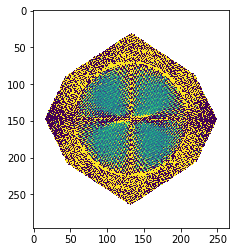

In [26]:
# Now we calculate the bar pattern speed
bar.get_PatternSpeed_2()
imshow(bar.Omegap, vmin=0.49, vmax=0.51)

In [28]:
# Another method
bar.get_PatternSpeed()
display(bar.Omegap)

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])